# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
# next load the data
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [5]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [9]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [11]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [13]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Linear Regression Model

In [19]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [21]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1, 'No':0})
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].replace({'Yes': 1, 'No': 0})

df['DiffWalking'] = df['DiffWalking'].replace({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})

df['PhysicalActivity'] = df['PhysicalActivity'].replace({'Yes': 1, 'No': 0})
df['Asthma'] = df['Asthma'].replace({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].replace({'Yes': 1, 'No': 0})


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [25]:
df2 = pd.get_dummies(df, columns=['AgeCategory','Race','GenHealth','Diabetic'],dtype='int')

In [27]:
df2.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,1,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,0,0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8,0,26.45,0,0,0,0.0,0.0,0,0,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
9,0,40.69,0,0,0,0.0,0.0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [29]:
df2.shape

(319795, 42)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   PhysicalActivity                     319795 non-null  int64  
 10  SleepTime                            319795 non-null  float64
 11  Asthma       

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [57]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,6.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,1,5.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,1,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [65]:
from sklearn.model_selection import train_test_split
# val + rest
train_test, val_df = train_test_split(df2, test_size=8000, random_state=42)

# train + test
train_df, test_df = train_test_split(train_test, test_size=8000, random_state=42)


In [67]:
train_df.shape,val_df.shape,test_df.shape

((303795, 42), (8000, 42), (8000, 42))

In [71]:
x = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=8000, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=8000, stratify=y_train)

In [75]:
x_train.shape, y_train.shape,x_val.shape,y_val.shape, x_test.shape, y_test.shape

((303795, 41), (303795,), (8000, 41), (8000,), (8000, 41), (8000,))

In [85]:
# train your model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lrmodel = model.fit(x_train, y_train)

In [87]:
# evaluate your model
# we need mean absolute error


# train_mae = mean_absolute_error(y_train,train_pred)
# print('Train error is', train_mae)
r2 = r2_score(y_train,train_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.170


In [88]:
# make predictions om test set
y_test_lr = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error( y_test,y_test_lr)
print('Test error is', test_mae)

Test error is 52.33339040790158


In [89]:

r2 = r2_score(y_test, y_test_lr)
print(f"R² Score: {r2:.3f}")


R² Score: 0.154


## Decision Tree Model

In [90]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [91]:
# create an instance of the class

dt = DecisionTreeRegressor(max_depth=10, max_features=0.5,min_samples_leaf=5)

In [92]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [93]:
# make predictions using the test set
y_train_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(y_train,y_train_pred)
print(train_mae)

r2 = r2_score(y_train,y_train_pred)
print(f"R² Score: {r2:.3f}")

37.94585512967561
R² Score: 0.506


In [94]:
# make predictions using the test set
y_test_pred = dtmodel.predict(x_test)

In [95]:
# evaluate the model
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.186


## Random Forest Model

In [222]:
# create an instance of the model
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(
    n_estimators=200,         # increase trees to improve stability
    max_depth=10,             # decrease to simplify trees
    min_samples_split=5,      # minimiun split per tree
    min_samples_leaf=10,      # 10 leaves per tree at least
    random_state=42
)


In [223]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [224]:
# make prediction on train set
y_train_pred = rfmodel.predict(x_train)

In [225]:
train_mae = mean_absolute_error(y_train,y_train_pred)
print(train_mae)

r2 = r2_score(y_train,y_train_pred)
print(f"R² Score: {r2:.3f}")

45.392234628592966
R² Score: 0.344


In [226]:
y_val_pred = rfmodel.predict(x_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"Test MAE: {val_mae:.2f}")

r2 = r2_score(y_val,y_val_pred)
print(f"R² Score: {r2:.3f}")

Test MAE: 47.54
R² Score: 0.250


In [227]:
# make predictions on the x_test values
y_test_pred = rfmodel.predict(x_test)

In [228]:
# evaluate the model
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test MAE: {test_mae:.2f}")

r2 = r2_score(y_test,y_test_pred)
print(f"R² Score: {r2:.3f}")

Test MAE: 46.98
R² Score: 0.241


In [314]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.transform(x_test)
X_val_scaled  = scaler.transform(x_val)

In [333]:

model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    alpha=1e-6,
    learning_rate='adaptive',
    batch_size=64,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=2000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

MLPRegressor(alpha=1e-06, batch_size=64, early_stopping=True,
             hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
             max_iter=2000, random_state=42)

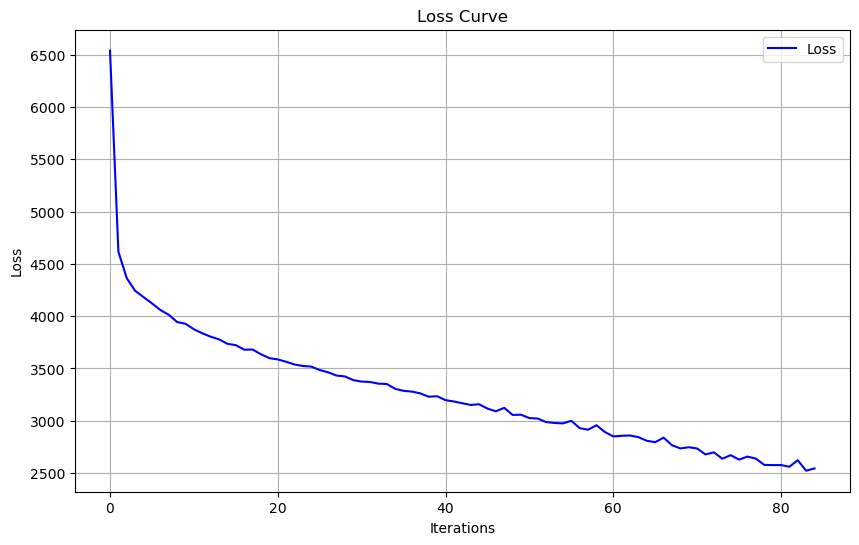

In [334]:
import matplotlib.pyplot as plt

loss_values = model.loss_curve_

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Loss', color='blue')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [335]:
# training set
y_train_pred = model.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R² Score: {train_r2:.3f}")


Train R² Score: 0.512


In [336]:
# dev set
y_val_pred = model.predict(X_val_scaled)
r2 = r2_score(y_val,y_val_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.337


In [337]:
# test set
y_test_pred = model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R² Score: {test_r2:.3f}")

Test R² Score: 0.365


In [40]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model','wb'))

In [ ]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [ ]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0]])

C:\Users\KANGRSW\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([258697.91])

In [41]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
266,2013,503,167,2,2,1200,1940,2744,1,1,1,73,1,0


In [1]:
!which conda

C:/ProgramData/anaconda3/Library/bin/conda.bat
